In [78]:
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.constants import epsilon_0
from scipy.integrate import solve_ivp

In [79]:
# parameter declarations
Z = 2
wavelength = 1030e-9
c = 299792458
frequency = 2*math.pi*c/wavelength
electron_charge = 1.602176634e-19 # C
electron_mass = 9.1093837139e-31 # Kg
reduced_planck = 1.054571817e-34 # J
# band_gap = 9.4 to 9.9 google says 8.96
band_gap = 9.0*1.60217662e-19 #converted from eV to J
pi = math.pi

# 350 fs laser pulse
e_amplitude = 2.74e10 # V/m
eosc = ((electron_charge**2)*(e_amplitude**2))/(4*electron_mass*(frequency**2))
print('eosc', eosc)
nph = band_gap/(reduced_planck*frequency)
print("nph", nph, "band gap", band_gap, "reduced planck", reduced_planck, "freq", frequency)
boltzmann_constant = 1.380649e-23 # J/K
a_bohr = (reduced_planck**2)/(electron_mass*(electron_charge**2))
free_electron_not = 1e-20
free_atom0 = 6.6e22
wmpi = (frequency*(nph**1.5))*((eosc/(2*band_gap))**nph)
#wmpi = (frequency*(nph**1.5))*((19.0/(2*9.0))**nph)
print("wmpi", wmpi)

eosc 1.5814163784869156e-18
nph 7.47675916917111 band gap 1.4419589580000001e-18 reduced planck 1.054571817e-34 freq 1828787929426070.8
wmpi 418574579503661.6


In [80]:
#temporarily assuming a 1:1 electron to free atom ionization ratio
def electron_density(free_electron, free_atom_current, time):
    
    na_term = free_atom0*wmpi/wimp
    one_minus = 1-math.exp(-1*wimp*time)
    free_electron = (free_electron + na_term*one_minus)*(math.exp(wimp*t))
    free_atom_current = free_atom0 - free_electron
    return free_electron, free_atom_current

def cw(free_electron):
     return 0.31*pi*a_bohr*(free_electron**1/3)

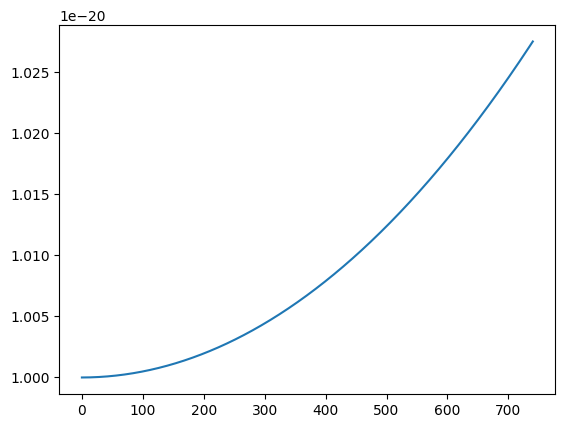

In [81]:
rho = []
for t in range(741):
    dt = t*pow(10,-17)
    p_exchange = (3/2)*cw(free_electron_not)*((boltzmann_constant*293.15)/reduced_planck) #assuming 293.15 kelvin lattice temperature
    wimp = (eosc/band_gap)*((frequency**2*p_exchange)/(p_exchange**2+frequency**2))
    free_electron_not, free_atom = electron_density(free_electron_not,free_atom0,dt)
    rho.append(free_electron_not)
xs = [x for x in range(len(rho))]
plt.plot(xs, rho)
plt.show()
plt.close()

n_free 1e+20 w_imp 0 na 6.6e+22 wmpi/1e14 4.185745795036616
n_free 1e+20 w_imp 14041227452.859514 na 6.595e+22 wmpi/1e14 4.185745795036616
n_free 1.0000001404122746e+20 w_imp 14041228110.04638 na 6.5949999992979386e+22 wmpi/1e14 4.185745795036616
n_free 1.0000002808245754e+20 w_imp 14041228767.233305 na 6.594999998595877e+22 wmpi/1e14 4.185745795036616
n_free 1.0000004212369025e+20 w_imp 14041229424.420294 na 6.594999997893815e+22 wmpi/1e14 4.185745795036616
n_free 1.0000005616492559e+20 w_imp 14041230081.60734 na 6.594999997191753e+22 wmpi/1e14 4.185745795036616
n_free 1.0000007020616355e+20 w_imp 14041230738.79445 na 6.594999996489691e+22 wmpi/1e14 4.185745795036616
n_free 1.0000008424740415e+20 w_imp 14041231395.98162 na 6.594999995787629e+22 wmpi/1e14 4.185745795036616
n_free 1.0000009828864737e+20 w_imp 14041232053.168856 na 6.594999995085567e+22 wmpi/1e14 4.185745795036616
n_free 1.0000011232989323e+20 w_imp 14041232710.35615 na 6.594999994383505e+22 wmpi/1e14 4.185745795036616
n

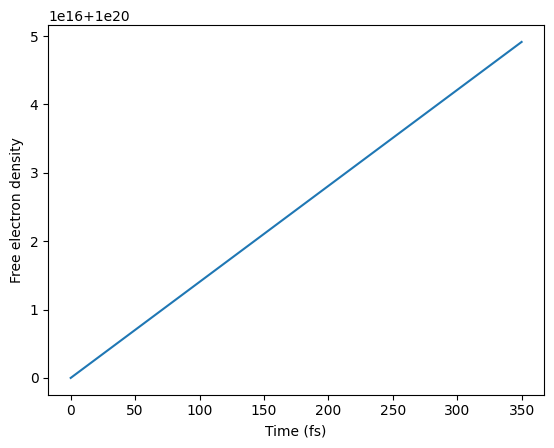

In [82]:
time_array = np.linspace(0,350,num=3500)
time_array *= 1e-15
dt = 1e-17
t0 = 0
n_free = 0
na = free_atom0
w_imp = 0

def update_wimp(n_free, temperature):
    cw_value = 0.31*pi*5.28e-11*(n_free**(1./3))
    p_exchange = (3/2)*cw_value*((boltzmann_constant*temperature)/reduced_planck)
    w_imp = (eosc/band_gap)*((frequency**2*p_exchange)/(p_exchange**2+frequency**2))
    return w_imp

def update_na(n_free):
    return free_atom0 - n_free/2 # Assuming only single-charged ionization can occur.

l = []
for t in time_array:
    if t < 350e-15:
        print("n_free",n_free,"w_imp", w_imp,"na", na,"wmpi/1e14", wmpi*1e-14)
        n_free += dt*(n_free * w_imp + na * w_mpi)
    w_imp = update_wimp(n_free, 273.15)
    na = update_na(n_free)
    l.append(n_free)

outputs = np.array(l)
plt.plot(time_array*1e15, outputs)
#plt.yscale('log',base=10) 
plt.ylabel("Free electron density")
plt.xlabel("Time (fs)")
plt.show()

In [83]:
def coulombLog(bmax, bmin):
    return math.log(bmax/bmin, math.e)

temp = 80000

def findplasmafreq(n_free):
    epsilon_0 = 8.85418781*1e-12
    return math.sqrt(n_free*electron_charge**2  /electron_mass*epsilon_0)

def findbmax(n_free, laserfreq, plasmafreq):
    top = math.sqrt(boltzmann_constant_J*temp/electron_mass)
    bottom = max(laserfreq, plasmafreq)
    return top/bottom

def findbmin(temp):
    option1 = Z*(electron_charge**2)/(boltzmann_constant*temp)
    option2 = reduced_planck_J/np.sqrt(electron_mass*boltzmann_constant*temp)
    return max(option1,option2)

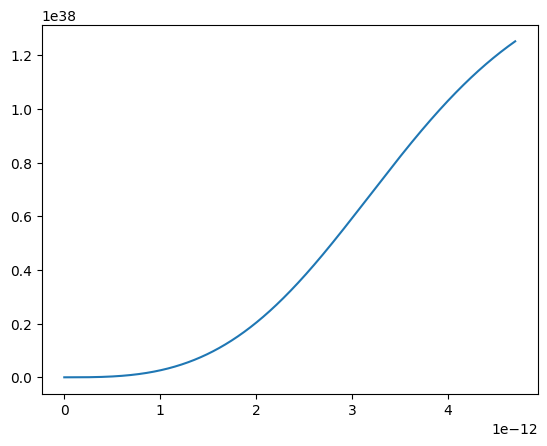

In [84]:
def dnedt(t, ne):
    cw_value = 0.31*3.141592*5.28e-11*(ne**(1./3))
    p_exchange = (3/2)*cw_value*((boltzmann_constant*87000)/reduced_planck)
    w_imp = (eosc/band_gap)*((frequency**2*p_exchange)/(p_exchange**2+frequency**2))
    return ne*w_imp - 5.06336e-27*ne**2

ne0 = 2.2e25
t = np.linspace(0, 4700*pow(10,-15), 4700)
sol = solve_ivp(dnedt, t_span=(0, max(t)), y0=[ne0], t_eval=t, method="RK45")
rho = sol.y[0]
plt.plot(t, rho)
plt.show()
plt.close()
    

3188359.650849717
3188359.650849717
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


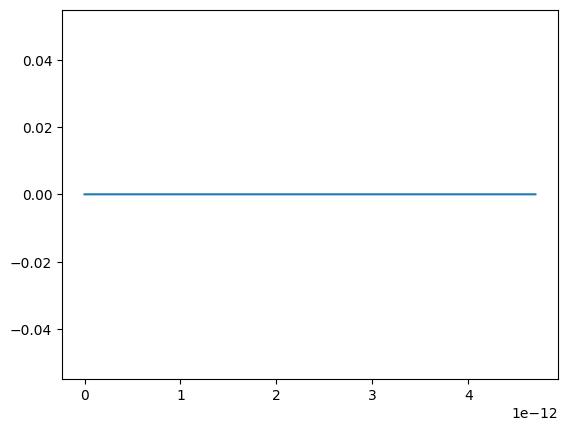

In [85]:
electron_mass = 9.1093837e-31 #kg
electron_charge = 1.60217663e-19 #C
reduced_planck_eV = 6.582119569e-16 #eV
reduced_planck_J = 1.054571814e-34 #J
boltzmann_constant_eV = 8.617333262e-5 #eV
boltzmann_constant_J = 1.380649e-23 #J
bohr_radius = (reduced_planck_J**2)/(electron_mass*(electron_charge**2))
e_osc_eV = 19 #according to Jingsen, but I calculate 9.866eV
laser_angular_freq = 1.83e15

def cw(current_electron_density):
    return 0.31*math.pi*bohr_radius*(current_electron_density**(1./3))

def p_exchange(current_electron_density):
    return (3*cw(current_electron_density)*boltzmann_constant_J*87000)/(2*reduced_planck_J) # temp temperature swap from 273.15 to 87000

def w_imp(current_electron_density):
    eV_term = e_osc_eV/9.0 #9.0eV is the band gap of SiO2
    rate_term_numerator = ((laser_angular_freq)**2)*p_exchange(current_electron_density)
    rate_term_denominator = (p_exchange(current_electron_density)**2) + (laser_angular_freq**2)
    rate_term = rate_term_numerator/rate_term_denominator
    return eV_term*rate_term
print(w_imp(2.2e25))


t = np.linspace(0, 4700*pow(10,-15), 4700)
rho = []
current_electron = 2.2e25
for dt in t:
    print(str(w_imp(current_electron)))
    current_electron = dt*(current_electron*w_imp(current_electron) - 5.06336e-27*current_electron**3)
    rho.append(current_electron)

plt.plot(t, rho)
plt.show()
plt.close()